<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW6Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


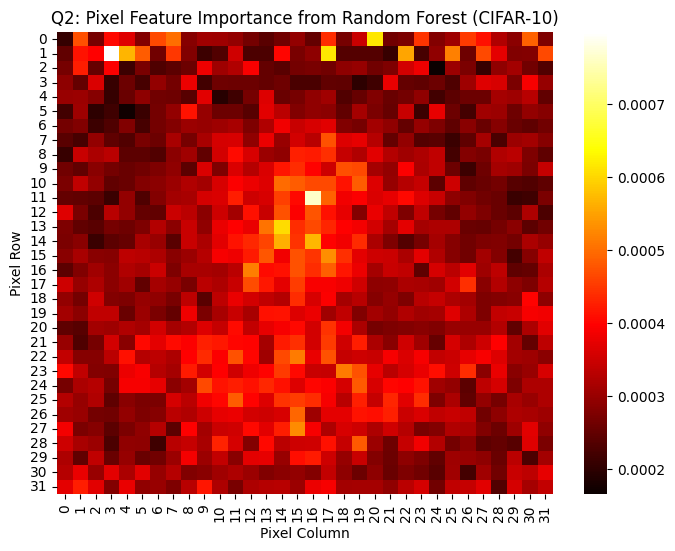

In [1]:
#Homework 6 Question 2

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CIFAR-10 dataset (train and test sets combined)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0).flatten()

# Flatten each image from (32, 32, 3) to (3072,)
X_flat = X.reshape((X.shape[0], -1))

# Sample a subset to reduce computation (optional but practical for large datasets)
sample_size = 10000
np.random.seed(42)
sample_indices = np.random.choice(len(X_flat), sample_size, replace=False)
X_sample = X_flat[sample_indices]
y_sample = y[sample_indices]

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_sample, y_sample)

# Get feature importances (shape: 3072, corresponding to pixels)
importances = rf.feature_importances_

# Reshape importances back to image shape (32, 32, 3)
importance_image = importances.reshape(32, 32, 3)
importance_grayscale = np.mean(importance_image, axis=2)  # Convert to grayscale

# Visualize pixel importance
plt.figure(figsize=(8, 6))
sns.heatmap(importance_grayscale, cmap='hot', cbar=True)
plt.title("Q2: Pixel Feature Importance from Random Forest (CIFAR-10)")
plt.xlabel("Pixel Column")
plt.ylabel("Pixel Row")
plt.show()
